Problem : Depending on various variables or features, predict whether driver will churn or not from the company.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df = pd.read_csv('./ola_driver_scaler.csv')
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


Dropping the redundant columns.

In [3]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [5]:
# changing the data type of date columns
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'])
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])

C:\Users\A Singh\AppData\Local\Temp\ipykernel_5680\2349884161.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['MMM-YY'] = pd.to_datetime(df['MMM-YY'])
C:\Users\A Singh\AppData\Local\Temp\ipykernel_5680\2349884161.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
C:\Users\A Singh\AppData\Local\Temp\ipykernel_5680\2349884161.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])


In [6]:
# counting duplicates in data
df.duplicated().sum()

0

In [7]:
# Null values in dataset
100*df.isna().sum()/df.shape[0]

MMM-YY                   0.000000
Driver_ID                0.000000
Age                      0.319305
Gender                   0.272194
City                     0.000000
Education_Level          0.000000
Income                   0.000000
Dateofjoining            0.000000
LastWorkingDate         91.541039
Joining Designation      0.000000
Grade                    0.000000
Total Business Value     0.000000
Quarterly Rating         0.000000
dtype: float64

##  EDA

In [8]:
df_eda = df.copy()

In [9]:
df_eda['target'] = df_eda['LastWorkingDate'].dt.date.where(df_eda['LastWorkingDate'].isnull(),0)
df_eda['target'] = df_eda['target'].where(df_eda['target'].notnull(),1)
df_eda['target'] = df_eda['target'].astype('int')

In [10]:
df_eda= df_eda.groupby(["Driver_ID"],sort = False).agg(
    
    Count_drivers_reported = ('MMM-YY','count'),
    Age = ('Age','last'),
    Gender = ("Gender",'first'),
    City = ("City",'last'),
    Education_level = ('Education_Level','last'),
    Income_first = ('Income','first'),
    Income_last = ('Income','last'),
    Dateofjoining_last = ('Dateofjoining','last'),
    LastWorkingDate_last = ('LastWorkingDate','last'),
    Joining_Designation = ("Joining Designation",'last'),
    Grade = ("Grade",'last'),
    Total_Business_Value = ('Total Business Value','sum'),
    Quarterly_Rating_first = ("Quarterly Rating",'first'),
    Quarterly_Rating_last = ("Quarterly Rating",'last'),
    target = ('target','last')
    
).reset_index()

### Univariate Analysis

% of drivers as per gender:  Gender
0.0    0.589668
1.0    0.410332
Name: proportion, dtype: float64


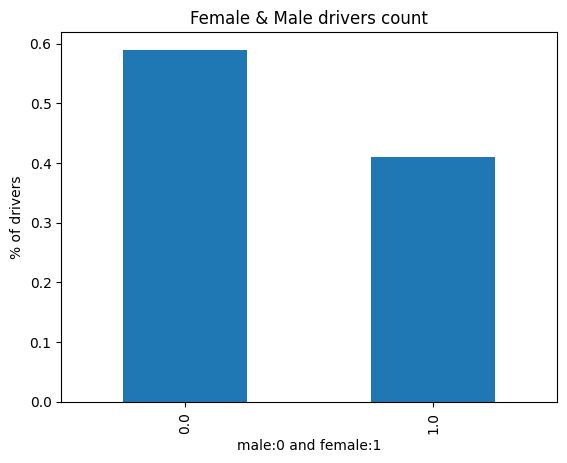

In [11]:
print('% of drivers as per gender: ',df_eda['Gender'].value_counts(normalize = True))
plt.title("Female & Male drivers count")
df_eda['Gender'].value_counts(normalize = True).plot(kind = 'bar')
plt.xlabel("male:0 and female:1")
plt.ylabel('% of drivers')
plt.savefig('./Female & Male drivers count.jpeg')

Females count is not insignificant among drivers. This is a good sign for females who can drive.

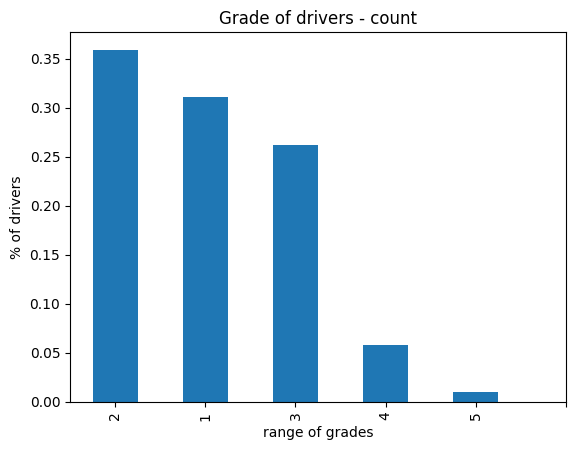

In [12]:
plt.title("Grade of drivers - count")
df_eda['Grade'].value_counts(normalize = True).plot(kind = 'bar')
plt.xlabel("range of grades")
plt.xticks( np.arange(6))
plt.ylabel('% of drivers')
plt.savefig('./Grade of drivers - count.jpeg')
plt.show()

Majority of drivers belong to Grade 2,Grade 1 . Least number of drivers belong to Grade 5

Joining_Designation
1    0.430911
2    0.342293
3    0.207056
4    0.015120
5    0.004620
Name: proportion, dtype: float64


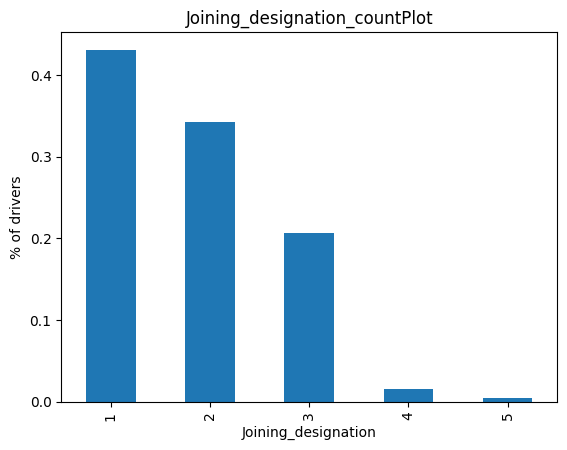

In [13]:
print(df_eda['Joining_Designation'].value_counts(normalize = True))
plt.title("Joining_designation_countPlot")
df_eda['Joining_Designation'].value_counts(normalize = True).plot(kind = 'bar')
plt.xlabel("Joining_designation")
plt.ylabel('% of drivers')
plt.savefig('./Joining_designation_countPlot.jpeg')

Most of the drivers belong teh Joining_designation of 1 and 2.Least belong to designation 5.

Education_level
2    0.336833
1    0.333893
0    0.329273
Name: proportion, dtype: float64


Text(0, 0.5, '% of drivers')

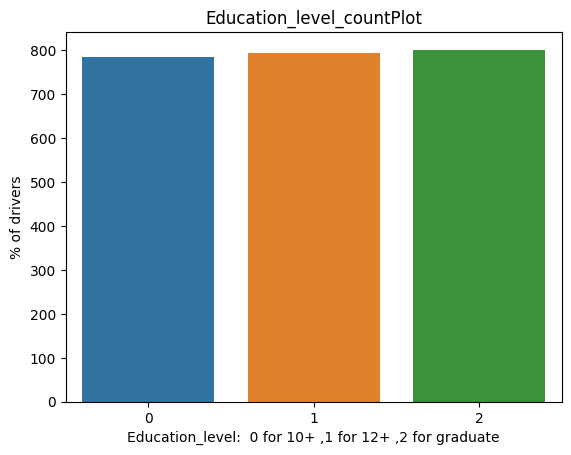

In [14]:
print(df_eda['Education_level'].value_counts(normalize = True))
plt.title("Education_level_countPlot")
sns.countplot(x = 'Education_level',data = df_eda)
plt.xlabel('Education_level:  0 for 10+ ,1 for 12+ ,2 for graduate')
plt.ylabel('% of drivers')

Drivers are almost equally distributed in terms of Education. 

Text(0.5, 1.0, 'Boxplot for Age of drivers')

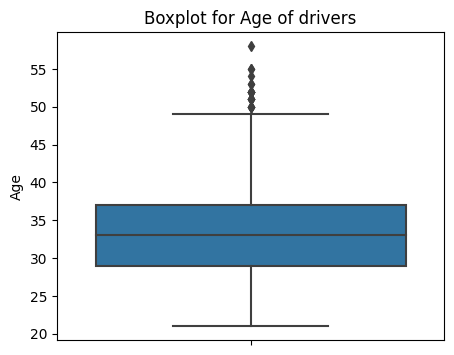

In [15]:
plt.figure(figsize = (5,4))
sns.boxplot(y = 'Age',data = df_eda)
plt.title('Boxplot for Age of drivers')

Median age of drivers is around 33 years.

Text(0.5, 1.0, 'Boxplot for total_business_value of drivers')

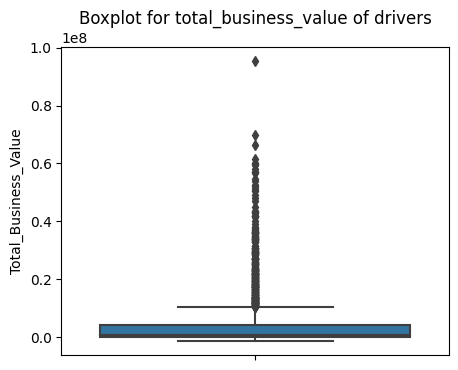

In [16]:
plt.figure(figsize = (5,4))
sns.boxplot(y = 'Total_Business_Value',data = df_eda)
plt.title('Boxplot for total_business_value of drivers')

<Axes: xlabel='Total_Business_Value', ylabel='Count'>

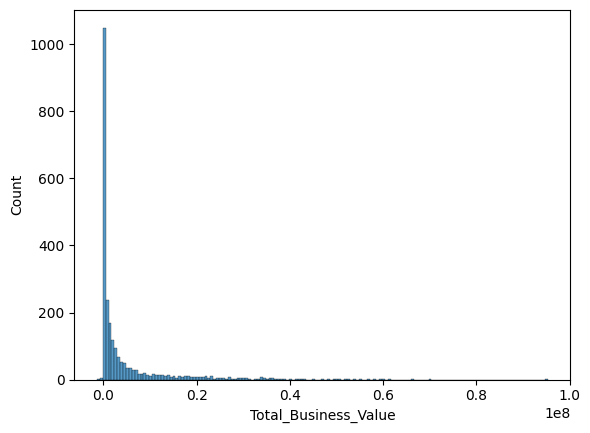

In [17]:
sns.histplot(df_eda['Total_Business_Value'])

The plot is rightly skewed, so needs to be standardized.

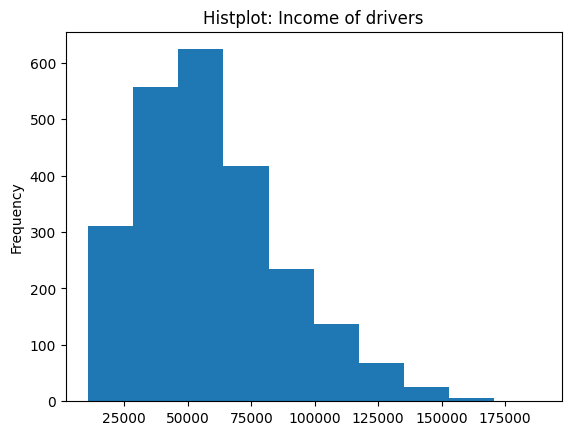

In [18]:
plt.title("Histplot: Income of drivers")
df_eda['Income_last'].plot(kind = 'hist')

plt.savefig('./Histplot: Income of drivers.jpeg')

Most of the drivers earn between 40,000 and 70,000 monthly.

Text(0, 0.5, '% of drivers')

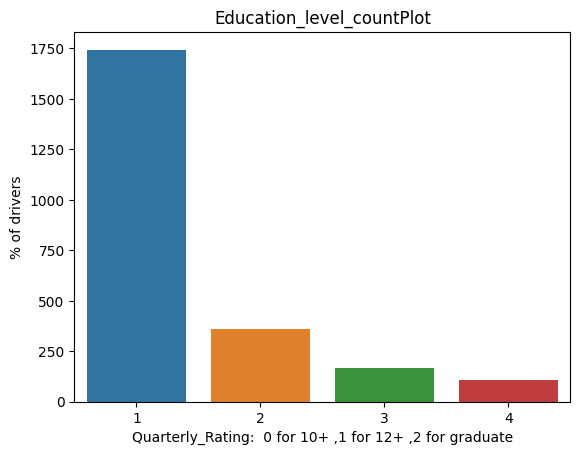

In [19]:
# print(df_eda['Quarterly_Rating_last'].value_counts(normalize = True))
plt.title("Education_level_countPlot")
sns.countplot(x = 'Quarterly_Rating_last',data = df_eda)
# sns.countplot(x = 'Quarterly_Rating_first',data = df_eda)
plt.xlabel('Quarterly_Rating:  0 for 10+ ,1 for 12+ ,2 for graduate')
plt.ylabel('% of drivers')

In [20]:
df_eda.columns

Index(['Driver_ID', 'Count_drivers_reported', 'Age', 'Gender', 'City',
       'Education_level', 'Income_first', 'Income_last', 'Dateofjoining_last',
       'LastWorkingDate_last', 'Joining_Designation', 'Grade',
       'Total_Business_Value', 'Quarterly_Rating_first',
       'Quarterly_Rating_last', 'target'],
      dtype='object')

### Bivariate Analysis

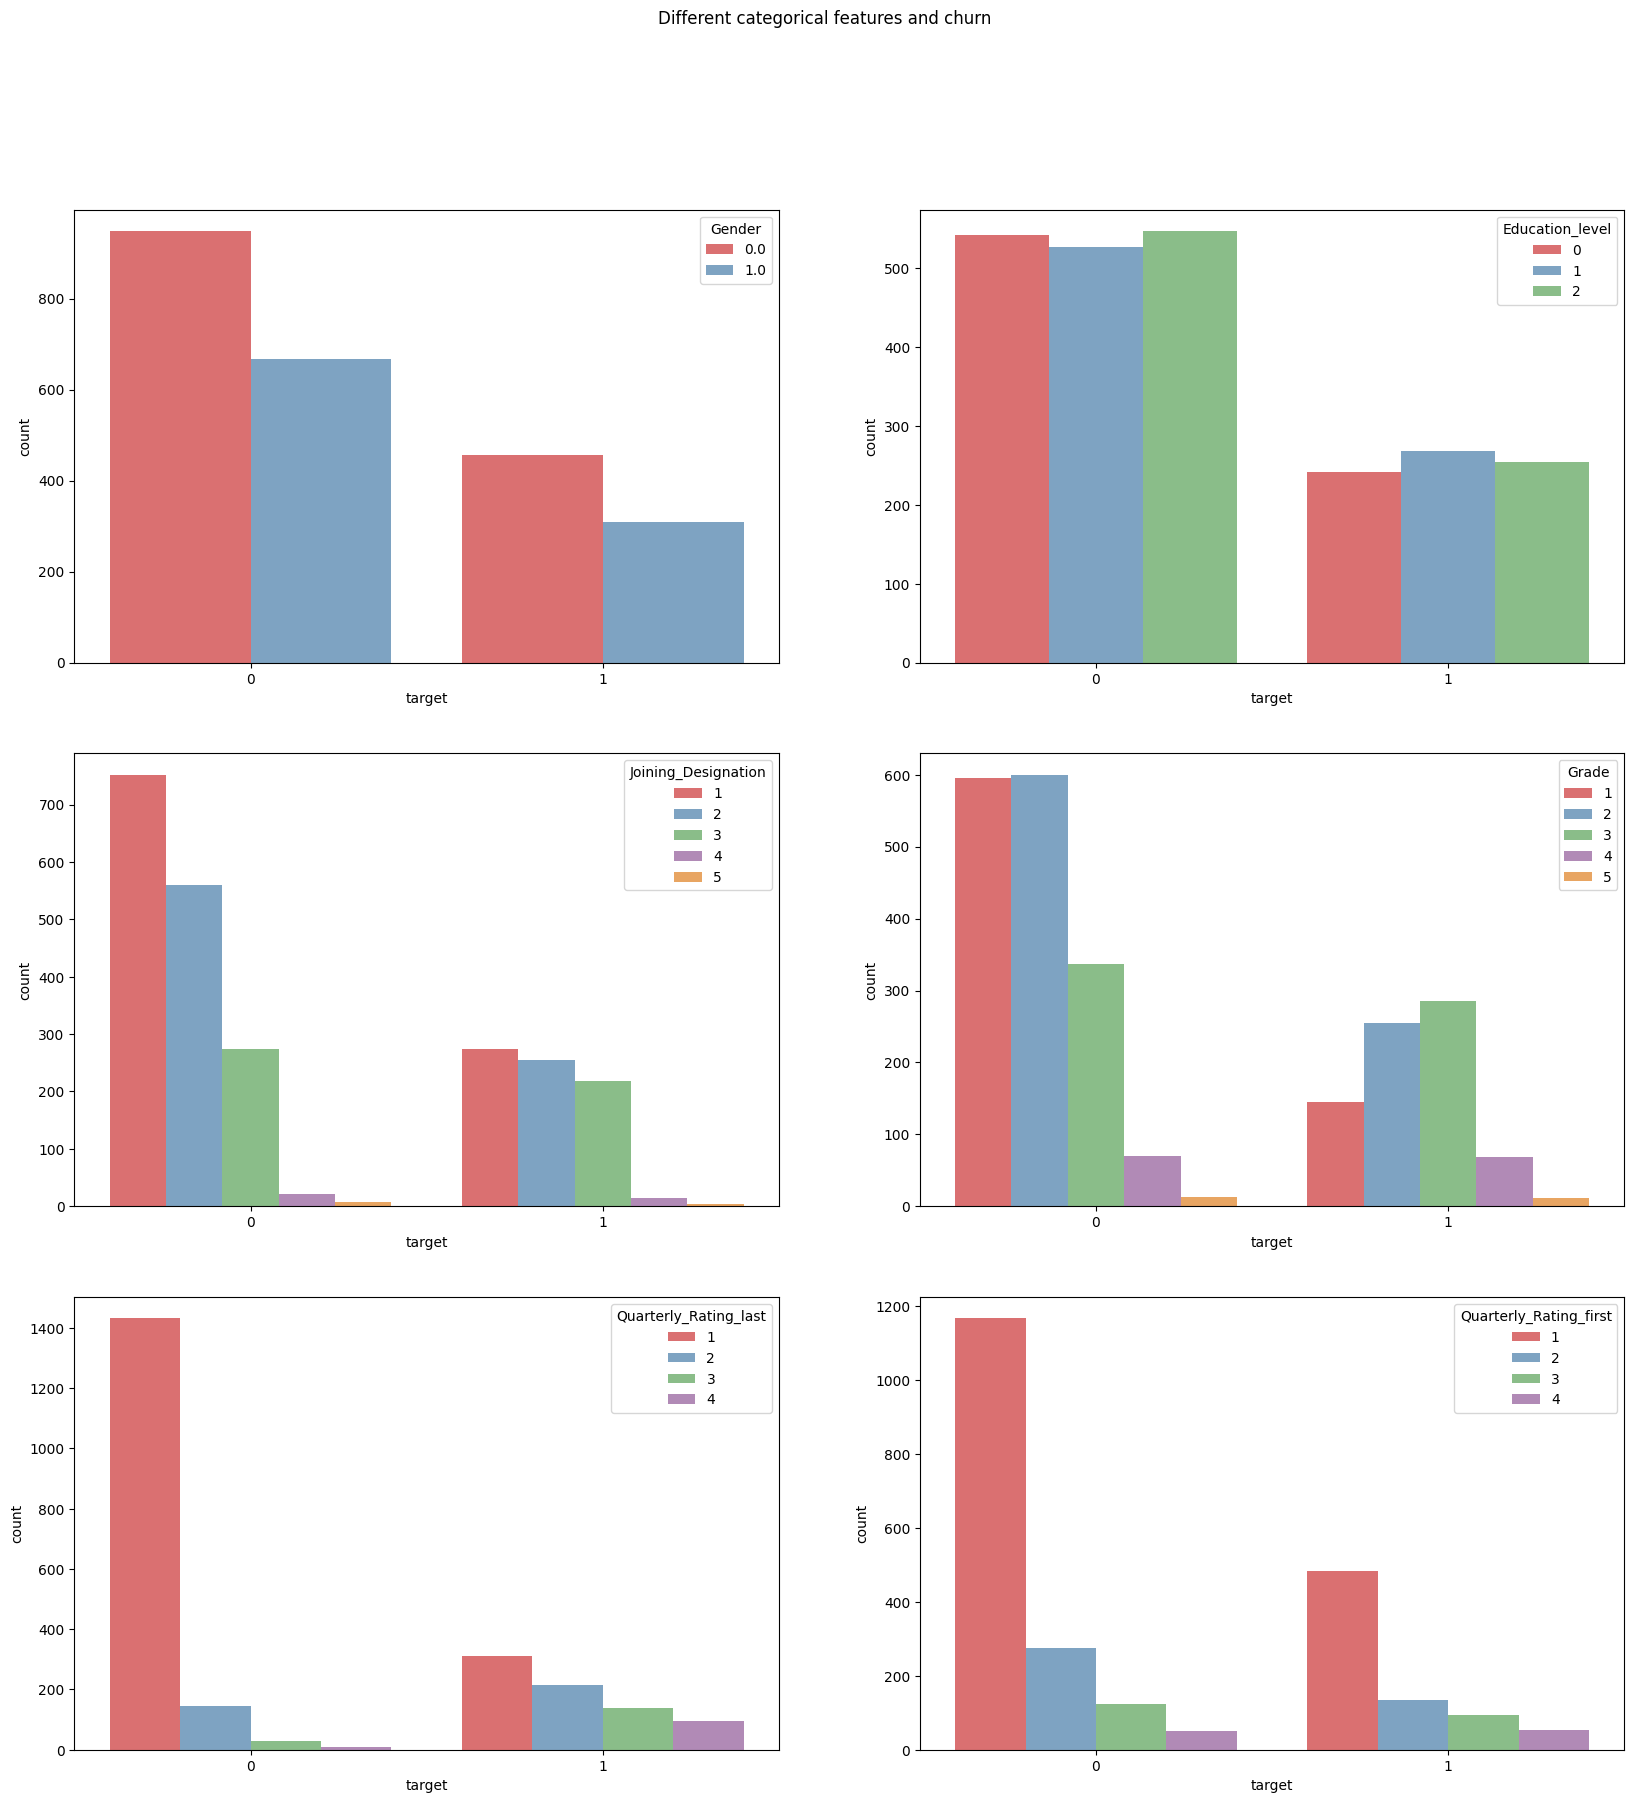

In [21]:
fig, axs = plt.subplots(3, 2, figsize=(20,20))
axs = axs.flatten()
fig.suptitle('Different categorical features and churn')
categorical2 = ['Gender', 'Education_level','Joining_Designation','Grade','Quarterly_Rating_last', "Quarterly_Rating_first"]
for ax, i in enumerate(categorical2):
    sns.countplot(x='target', alpha=0.7, hue=i, data=df_eda, ax=axs[ax],palette='Set1')

###### Observation
- Similar pattern is observed in Gender,joining_designation,and education level category in case of churning.
- Grade 3 Drivers are churning more.
- Drivers with high Quarterly ratig are also churning at fast rate.

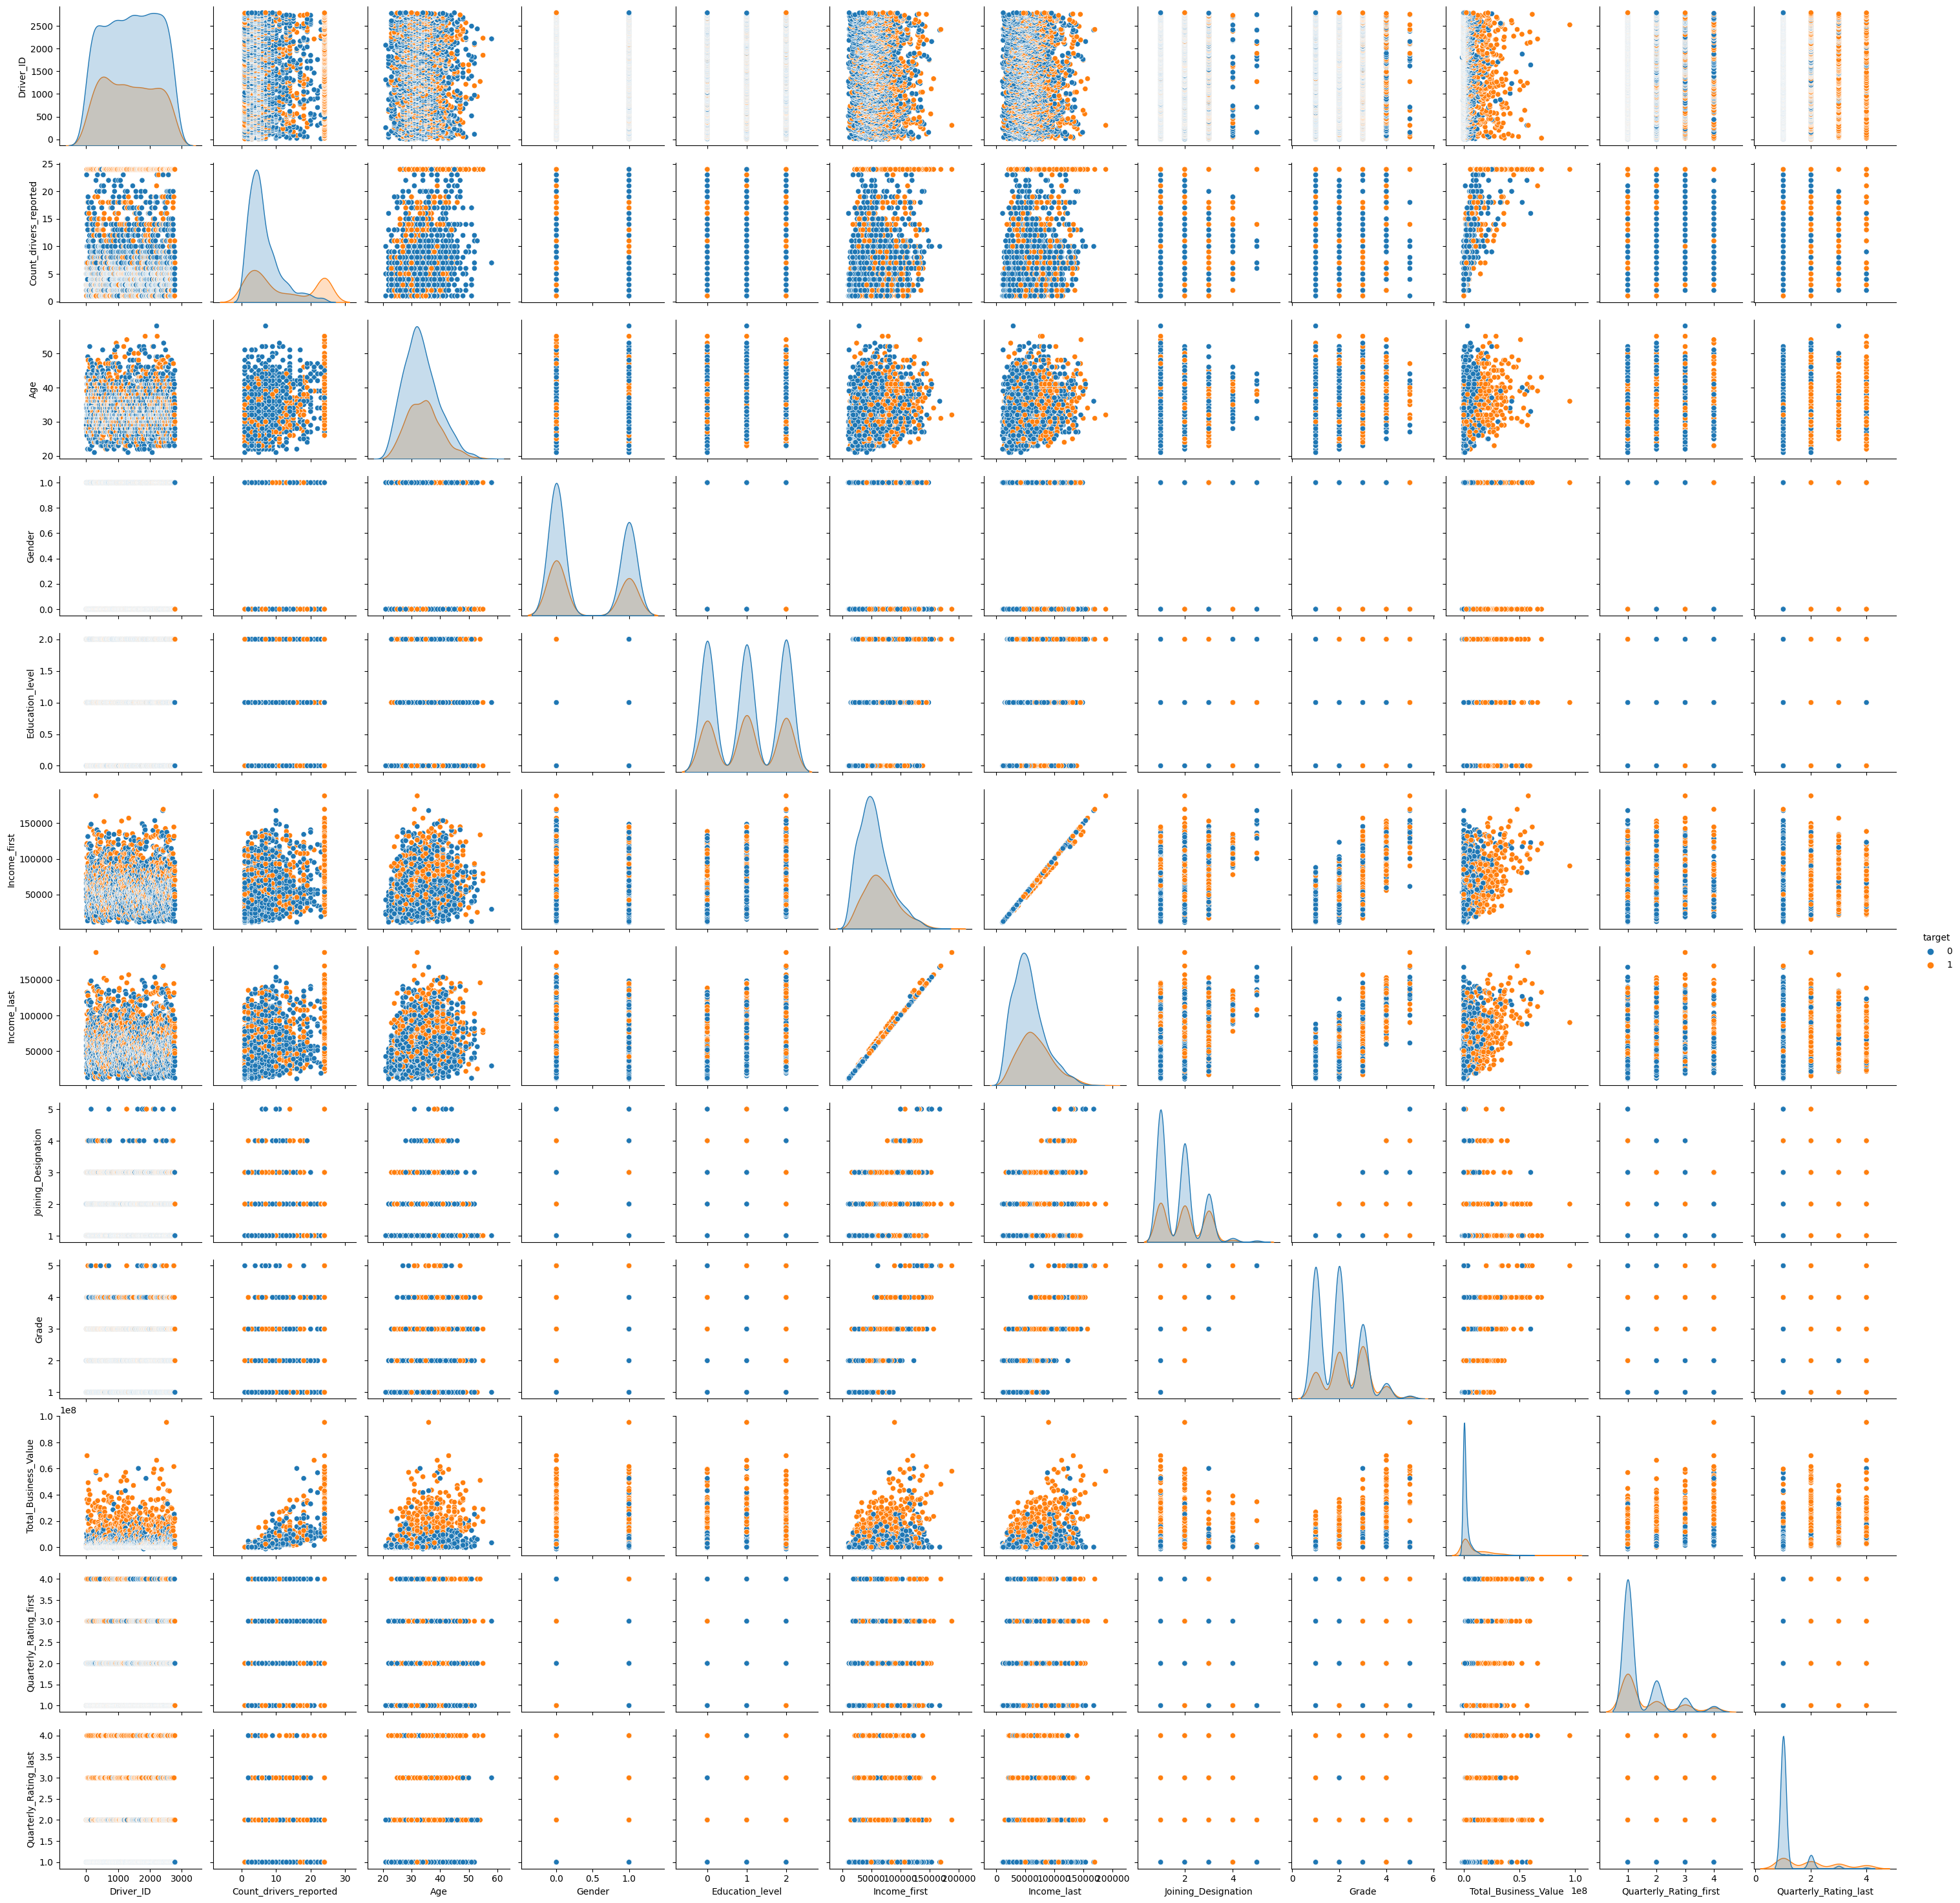

In [22]:
sns.pairplot(df_eda, hue = 'target')

#### Statistical Summary

In [23]:
df_eda.describe()

,Driver_ID,Count_drivers_reported,Age,Gender,Education_level,Income_first,Income_last,Dateofjoining_last,LastWorkingDate_last,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating_first,Quarterly_Rating_last,target
count,2381.000000,2381.00000,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381,1616,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000
mean,1397.559009,8.02352,33.663167,0.410332,1.00756,59209.060899,59334.157077,2019-02-08 07:14:50.550189056,2019-12-21 20:59:06.534653440,1.820244,2.096598,4.586742e+06,1.486350,1.427971,0.321294
min,1.000000,1.00000,21.000000,0.000000,0.00000,10747.000000,10747.000000,2013-04-01 00:00:00,2018-12-31 00:00:00,1.000000,1.000000,-1.385530e+06,1.000000,1.000000,0.000000
25%,695.000000,3.00000,29.000000,0.000000,0.00000,39104.000000,39104.000000,2018-06-29 00:00:00,2019-06-06 00:00:00,1.000000,1.000000,0.000000e+00,1.000000,1.000000,0.000000
50%,1400.000000,5.00000,33.000000,0.000000,1.00000,55276.000000,55315.000000,2019-07-21 00:00:00,2019-12-20 12:00:00,2.000000,2.000000,8.176800e+05,1.000000,1.000000,0.000000
75%,2100.000000,10.00000,37.000000,1.000000,2.00000,75765.000000,75986.000000,2020-05-02 00:00:00,2020-07-03 00:00:00,2.000000,3.000000,4.173650e+06,2.000000,2.000000,1.000000
max,2788.000000,24.00000,58.000000,1.000000,2.00000,188418.000000,188418.000000,2020-12-28 00:00:00,2020-12-28 00:00:00,5.000000,5.000000,9.533106e+07,4.000000,4.000000,1.000000
std,806.161628,6.78359,5.983375,0.491997,0.81629,28275.899087,28383.666384,NaN,NaN,0.841433,0.941522,9.127115e+06,0.834348,0.809839,0.467071


###### Observation
- Median age, education, Income,Joining_desination,Total_busines_value,Quarterly_rating of drivers: 33 years,1, 55000, 2, 817680, and 1 respectively.
- min Age of driver : 21 Years and max age: 58 years.
- max Education Level : 2 (ie. Graduate)

In [24]:
df_eda.columns

Index(['Driver_ID', 'Count_drivers_reported', 'Age', 'Gender', 'City',
       'Education_level', 'Income_first', 'Income_last', 'Dateofjoining_last',
       'LastWorkingDate_last', 'Joining_Designation', 'Grade',
       'Total_Business_Value', 'Quarterly_Rating_first',
       'Quarterly_Rating_last', 'target'],
      dtype='object')

In [25]:
plt.figure(figsize = (12,10))
sns.heatmap(df_eda.corr(),annot = True )
plt.title("Heatmap for Correlation among variables")
plt.savefig('./Heatmap for Correlation among variables.jpeg')
plt.show()

ValueError: could not convert string to float: 'C23'

<Figure size 1200x1000 with 0 Axes>

As per this plot, a positive correlation exists between number of times driver have to report and total business values by the driver. <br>
In addition, similar is the case with grade-income and grade-joining-designation.

Outliers

In [ ]:
q1 = df_eda['Total_Business_Value'].quantile(0.25)
q3 = df_eda['Total_Business_Value'].quantile(0.75)
iqr = q3 - q1
df_new3 = df_eda.loc[(df_eda['Total_Business_Value'] >= (q1 - 1.5*iqr)) & (df_eda['Total_Business_Value'] <= (q3 + 1.5*iqr))]

In [ ]:
print(f"Outliers in columns 'Total_Business_Value' %: {100 - len(df_new3)/len(df_eda)*100}")

There are around 14.11% of outliers present in this column alone. Hence, it is not wise to delete these outliers. Just for the checking the model performance, we'll be continuing with these outliers. We'll see how our model performs. If our model perform too bad then we can comeback later to remove outliers treatments by 'Isolation Forest' or some other technique for efficeint outlier removal, without much loss in data.

### Preprocessing, Standardization and missing value imputations

In [ ]:
# data preparation for KNN imputation
df_new = df[['Age', 'Education_Level',
       'Income','Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating']]

In [ ]:
# standardizing the data before imputation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(df_new)
scaled = scaler.transform(df_new)
df_standard = pd.DataFrame(data = scaled , columns = ['Age', 'Education_Level',
       'Income','Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating'])
df_standard.head()

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 5)
df_imputed =  pd.DataFrame(imputer.fit_transform(df_standard), columns = ['Age', 'Education_Level',
       'Income','Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating'])

In [ ]:
df_new2 = pd.concat([df['MMM-YY'],df['Driver_ID'], df['Gender'],df_imputed, df['City'],
                     df['Dateofjoining'],df['LastWorkingDate']], axis = 1)

In [ ]:
df_new2.info()

In [ ]:
df_agg = df_new2.groupby(["Driver_ID"],sort = False).agg(
    Report_count = ('MMM-YY','count'),
    Age = ('Age','last'),
    Gender = ("Gender",'first'),
    City = ("City",'last'),
    Education_level = ('Education_Level','first'),
    Income_first = ("Income",'first'),
    Income_last = ('Income','last'),
    Dateofjoining_last = ('Dateofjoining','last'),
    LastWorkingDate_last = ('LastWorkingDate','last'),
    Joining_Designation = ("Joining Designation",'mean'),
    Grade = ("Grade",'mean'),
    Total_Business_Value = ('Total Business Value','sum'),
    Quarterly_Rating_first = ("Quarterly Rating",'first'),
    Quarterly_Rating_last = ("Quarterly Rating",'last')
    
).reset_index()

In [ ]:
df_agg.shape

#### Feature Engineering

Whether the Quarterly rating of the driver has increased or not, if yes then label it as 1 else 0.

In [ ]:
df_agg["Quarterly_Rating"] = [1 if i>0 else 0 for i in df_agg["Quarterly_Rating_last"] - df_agg["Quarterly_Rating_first"] ]
df_agg.tail()

In [ ]:
plt.title("% of driver with raised Quarterly rating")
(df_agg['Quarterly_Rating'].value_counts(normalize = True)*100).plot(kind = 'bar')
plt.savefig('./% of driver with raised Quarterly rating.jpeg')

Only around 15% of drivers experience raised Quarterly rating.

Creating a column which tells whether the **monthly income** has increased for that driver - for those whose monthly income has increased we assign the value 1.

In [ ]:
df_agg['Income_raise'] = [1 if x > 0 else 0 for x in  df_agg['Income_last'] - df_agg['Income_first']]

In [ ]:
print(df_agg['Income_raise'].value_counts(normalize = True)*100)
plt.title("% of driver with raised Income")
(df_agg['Income_raise'].value_counts(normalize = True)*100).plot(kind = 'bar')
plt.savefig('./% of driver with raised Income.jpeg')

Creating 'Target' variable. In the column "LastWorkingDate_last" column if date is present then it will mapped as 0 else 1. There, 1 will represent all the **driver who have left or churned** from the company.  <br>
How many months did a driver drived will be the difference of last working date and first joining date. this we'll represent in months.

In [ ]:
df_agg['Months_Drived'] = round((df_agg['LastWorkingDate_last'].astype('datetime64').dt.date -
       df_agg['Dateofjoining_last'].astype('datetime64').dt.date)/np.timedelta64(1,'M'),2)
df_agg.head(15)

In [ ]:
plt.title("Months drivers drove before churning")
sns.histplot(df_agg['Months_Drived'])
plt.savefig('./Months drivers drove before churning.jpeg')

In [ ]:
df_agg['Target'] = df_agg['LastWorkingDate_last'].dt.date.where(df_agg['LastWorkingDate_last'].isnull(),0)
df_agg['Target'] = df_agg['Target'].where(df_agg['Target'].notnull(),1)
df_agg['Target'] = df_agg['Target'].astype('int')

In [ ]:
df_agg['Dateofjoining_last_year'] = df_agg['Dateofjoining_last'].dt.year
df_agg['Dateofjoining_last_month'] = df_agg['Dateofjoining_last'].dt.month
df_agg['Dateofjoining_last_day'] = df_agg['Dateofjoining_last'].dt.day


In [ ]:
df_agg.drop(['Income_first','LastWorkingDate_last','Quarterly_Rating_last','Quarterly_Rating_first','Dateofjoining_last', 'LastWorkingDate_last','Months_Drived'], axis = 1, inplace = True)

In [ ]:
df_agg.isna().sum()

In [ ]:
plt.title("Churning of drivers per year")
sns.countplot(x = df_agg['Dateofjoining_last_year'],hue = 'Target', data = df_agg)
plt.savefig('./Churning of drivers per year.jpeg')

Max churning was observed in the year 2020 possibly due to covid. Before 2020, many driver have joined the company and also churn rate was low.

In [ ]:
plt.title("Churning of drivers vs month")
sns.countplot(x = df_agg['Dateofjoining_last_month'],hue = 'Target', data = df_agg)
plt.savefig('./Churning of drivers vs month.jpeg')

In [ ]:
plt.title("Churning of drivers vs day")
sns.countplot(x = df_agg['Dateofjoining_last_day'],hue = 'Target', data = df_agg)
plt.savefig('./Churning of drivers vs day.jpeg')

In [ ]:
plt.title("Report count and churning")
sns.histplot(data=df_agg, x="Report_count",hue = 'Target', kde = True)
plt.savefig('./Report count and churning.jpeg')

In [ ]:
df_agg.describe()

Encoding

In [ ]:
from category_encoders import TargetEncoder
encode = TargetEncoder()
df_agg['City'] = encode.fit_transform(df_agg['City'], df_agg['Target'])

In [ ]:
X = df_agg[['Driver_ID', 'Report_count', 'Age', 'Gender', 'City', 'Education_level',
       'Income_last', 'Joining_Designation', 'Grade', 'Total_Business_Value',
       'Quarterly_Rating', 'Income_raise', 'Dateofjoining_last_year',
       'Dateofjoining_last_month', 'Dateofjoining_last_day']]
y = df_agg['Target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

Imbalance data check

In [ ]:
y_train.value_counts(normalize  = True)

SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_sm,y_sm = smt.fit_resample(X_train,y_train)

Model 1 : Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import KFold,cross_validate
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
params = {
    "n_estimators": [10,25,50,100,150,200],
    "max_depth" : [5, 7,9,11,13,15,16,17],
    "max_leaf_nodes" : [15, 20, 25,30,35]
}

rfc = RandomForestClassifier(n_jobs = -1)
clf = RandomizedSearchCV(rfc, params, scoring = "accuracy", cv=3, n_jobs = -1, verbose = 1)

clf.fit(X_train, y_train)


In [ ]:
results = clf.cv_results_

for i in range(len(results["params"])):
  print(f"Parameters:{results['params'][i]} Mean_score: {results['mean_test_score'][i]} Rank: {results['rank_test_score'][i]}")


In [ ]:
rfc = RandomForestClassifier(n_estimators = 50, max_leaf_nodes = 25, max_depth = 7)
model1_rfc = rfc.fit(X_train,y_train)

feature importance

In [ ]:
importances_rfc = model1_rfc.feature_importances_
index = np.argsort(importances_rfc)[::-1]
col_names_rfc = [X_train.columns[i] for i in index]
plt.bar(range(X_train.shape[1]), importances_rfc[index])
plt.xticks(range(X_train.shape[1]),col_names_rfc, rotation = 90)
plt.title("Feature importance of variables by model2 : XG Boost (Boosting)")
plt.show()

As per model1, Report_count is the most important feature that affects the churning of drivers, followed by the year they joined and Quarterly_rating (whether it increased or not). Gender ahs least affect on the churn rate.

In [ ]:
y_pred_rfc = model1_rfc.predict(X_test)
y_pred_rfc_prob = model1_rfc.predict_proba(X_test)

Model 2 : Boosting

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold

In [ ]:
params = {
        'estimators' : [100,150,200,250,300],
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,7,9]
        }

In [ ]:
xgb = XGBClassifier()

In [ ]:
folds = 5
param_comb = 5

skf = KFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )


random_search.fit(X_train,y_train)

In [ ]:
res3 = random_search.cv_results_

for i in range(len(res3["params"])):
  print(f"Parameters:{res3['params'][i]} Mean_score: {res3['mean_test_score'][i]} Rank: {res3['rank_test_score'][i]}")
print(f'Best score: {random_search.best_score_}')

In [ ]:
xgb_best = XGBClassifier(subsample = 0.8, min_child_weight = 1, max_depth = 7, gamma = 0.5,
                         estimators = 250, colsample_bytree = 1)

In [ ]:
model2_xgb = xgb_best.fit(X_train,y_train)

Feature Importance

In [ ]:
importances_xgb = model2_xgb.feature_importances_
index = np.argsort(importances_xgb)[::-1]
col_names_xgb = [X_train.columns[i] for i in index]
plt.bar(range(X_train.shape[1]), importances_xgb[index])
plt.xticks(range(X_train.shape[1]),col_names_xgb, rotation = 90)
plt.title("Feature importance of variables by model2 : XG Boost (Boosting)")
plt.show()

This plot shows that the most important features that affect the driver's churning are : year of joining, Quarting_Rating (rose or not), and Report count (number of times driver had to report to the company). As per this model, Income raise has least impact on the driver's churn rate.

In [ ]:
y_pred_xgb = model2_xgb.predict(X_test)
y_pred_xgb_prob = model2_xgb.predict_proba(X_test)

### Model Evaluation

#### 1. classification report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(f"Classification report by the model 1: Random Forest (Bagging)\n {classification_report(y_test,y_pred_rfc)}")
print(f"Classification report by the model 2: XG Boost (Boosting)\n {classification_report(y_test,y_pred_xgb)}")

Model 2 : XG Boost is 93% accurate while model 1: Random Forest (Bagging) is only 91% accurate which is statisfactory. 

#### 2. ROC-AUC score and curve

In [ ]:
from sklearn.metrics  import roc_auc_score, roc_curve

In [ ]:
auc_score_rfc = roc_auc_score(y_test,y_pred_rfc)

auc_score_xgb = roc_auc_score(y_test,y_pred_xgb)

print(f'AUC score from model1: Random Forest (Bagging) {auc_score_rfc}\n AUC score from model 2: XG Boost (Boosting) {auc_score_xgb}')

In [ ]:
# for random forest rf
fpr_rfc,tpr_rfc,thresh = roc_curve(y_test,y_pred_rfc_prob[:,1], pos_label = 1) 
random_probs_rfc = [i for i in range(len(y_test))]
p_fpr_rfc,p_tpr_rfc,_ = roc_curve(y_test,random_probs_rfc, pos_label = 1)

# for xgboost xgb
fpr_xgb,tpr_xgb,thresh = roc_curve(y_test,y_pred_xgb_prob[:,1], pos_label = 1) 
random_probs_xgb = [i for i in range(len(y_test))]
p_fpr_xgb,p_tpr_xgb,_ = roc_curve(y_test,random_probs_xgb, pos_label = 1)

In [ ]:
plt.plot(fpr_rfc,tpr_rfc, label = 'Bagging: Random Forest')
plt.plot(fpr_xgb,tpr_xgb, label = 'Boosting: XGBoost')
plt.plot()
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.legend(loc = 'best')

This above plot shows that XGBoost performs slightly better over Bagging (Random Forest).